# Handling NaN values in geom_ribbon()
`geom_ribbon()` will now break if `ymin` or `ymax` includes `NaN` values.

In [1]:
from lets_plot import *
from lets_plot.bistro import *
from scipy.stats import multivariate_normal
from lets_plot.geo_data import *
import pandas as pd
import numpy as np

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



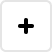
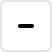
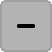
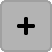
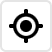
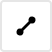
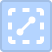
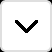
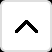
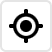
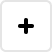
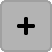
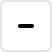
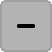
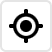
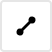
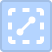
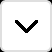
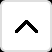
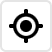

In [2]:
LetsPlot.setup_html()

In [3]:
df_full = pd.DataFrame({
    'x': [2, 6, 8, 9, 5, 7, 4, 3, 1, 0],
    'ymin': [1, 3, 4, 6, 4, 5, 2, 3, 2, 0],
    'ymax': [3, 5, 6, 8, 6, 7, 4, 5, 4, 2]
})

df_x = pd.DataFrame({
    'x': [2, 6, 8, 9, None, 7, 4, 3, 1, None],
    'ymin': [1, 3, 4, 6, 4, 5, 2, 3, 2, 0],
    'ymax': [3, 5, 6, 8, 6, 7, 4, 5, 4, 2]
})

df_ymin = pd.DataFrame({
    'x': [2, 6, 8, 9, 5, 7, 4, 3, 1, 0],
    'ymin': [1, 3, 4, 6, None, 5, 2, 3, 2, None],
    'ymax': [3, 5, 6, 8, 6, 7, 4, 5, 4, 2]
})

df_ymax = pd.DataFrame({
    'x': [2, 6, 8, 9, 5, 7, 4, 3, 1, 0],
    'ymin': [1, 3, 4, 6, 4, 5, 2, 3, 2, 0],
    'ymax': [3, 5, 6, 8, None, 7, 4, 5, 4, None]
})

In [4]:
full = ggplot(df_full) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax')) + ggtitle('Normal data')
x = ggplot(df_x) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax')) + ggtitle('NaN in x')
ymin = ggplot(df_ymin) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax')) + ggtitle('NaN in ymin')
ymax = ggplot(df_ymax) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'))  + ggtitle('NaN in ymax')

In [5]:
gggrid([full, x, ymin, ymax], ncol=2)

To keep the old behavior, filter invalid entries first.

In [6]:
df_ymin_filtered = df_ymin.dropna()

In [7]:
ggplot(df_ymin_filtered) + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax')) + ggtitle('NaN in ymin')